## Question 1

Step 1. Import the necessary libraries

In [1]:
import pandas as pd

Step 2. Import the dataset from this address.

Step 3. Assign it to a variable called users

In [3]:
users = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep='|')
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


Step 4. Discover what is the mean age per occupation

In [5]:
users.groupby('occupation').agg('mean')['age']

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

Step 5. Discover the Male ratio per occupation and sort it from the most to the least

In [9]:
(users[users['gender']=='M'].groupby('occupation')['gender'].count()/users.groupby('occupation')['gender'].count()).sort_values(ascending=False)

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
Name: gender, dtype: float64

Step 6. For each occupation, calculate the minimum and maximum ages

In [12]:
users.groupby('occupation').agg({'age':['min', 'max']})

age    
              min max
occupation           
administrator  21  70
artist         19  48
doctor         28  64
educator       23  63
engineer       22  70
entertainment  15  50
executive      22  69
healthcare     22  62
homemaker      20  50
lawyer         21  53
librarian      23  69
marketing      24  55
none           11  55
other          13  64
programmer     20  63
retired        51  73
salesman       18  66
scientist      23  55
student         7  42
technician     21  55
writer         18  60

Step 7. For each combination of occupation and sex, calculate the mean age

In [14]:
users.groupby(['occupation', 'gender']).agg({'age':'mean'})

age
occupation    gender           
administrator F       40.638889
              M       37.162791
artist        F       30.307692
              M       32.333333
doctor        M       43.571429
educator      F       39.115385
              M       43.101449
engineer      F       29.500000
              M       36.600000
entertainment F       31.000000
              M       29.000000
executive     F       44.000000
              M       38.172414
healthcare    F       39.818182
              M       45.400000
homemaker     F       34.166667
              M       23.000000
lawyer        F       39.500000
              M       36.200000
librarian     F       40.000000
              M       40.000000
marketing     F       37.200000
              M       37.875000
none          F       36.500000
              M       18.600000
other         F       35.472222
              M       34.028986
programmer    F       32.166667
              M       33.216667
retired       F       70.000000
              M       62.538462
salesman      F       27.000000
              M       38.555556
scientist     F       28.333333
              M       36.321429
student       F       20.750000
              M       22.669118
technician    F       38.000000
              M       32.961538
writer        F       37.631579
              M       35.346154

Step 8. For each occupation present the percentage of women and men

In [18]:
(users.groupby(['occupation', 'gender'])['gender'].count()/users.groupby('occupation')['gender'].count()).apply(lambda x: round(x*100, 2))

occupation     gender
administrator  F          45.57
               M          54.43
artist         F          46.43
               M          53.57
doctor         M         100.00
educator       F          27.37
               M          72.63
engineer       F           2.99
               M          97.01
entertainment  F          11.11
               M          88.89
executive      F           9.38
               M          90.62
healthcare     F          68.75
               M          31.25
homemaker      F          85.71
               M          14.29
lawyer         F          16.67
               M          83.33
librarian      F          56.86
               M          43.14
marketing      F          38.46
               M          61.54
none           F          44.44
               M          55.56
other          F          34.29
               M          65.71
programmer     F           9.09
               M          90.91
retired        F           7.14
               M  

## Question 2

In [19]:
import pandas as pd

Step 2. Import the dataset from this address
Step 3. Assign it to a variable called euro12

In [20]:
euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


Step 4. Select only the Goal column

In [21]:
euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

Step 5. How many team participated in the Euro2012?

In [25]:
print(euro12['Team'].nunique())

16


 Step 6. What is the number of columns in the dataset?

In [27]:

print(len(euro12.columns))

35


Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline



In [28]:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline.head()

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0


Step 8. Sort the teams by Red Cards, then to Yellow Cards

In [32]:
discipline.sort_values(['Red Cards', 'Yellow Cards'], inplace=True)

/var/folders/5f/klt5vdq54d5dl547kr9d61_40000gn/T/ipykernel_82574/3847407171.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discipline.sort_values(['Red Cards', 'Yellow Cards'], inplace=True)


In [33]:
discipline

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


Step 9. Calculate the mean Yellow Cards given per Team

In [34]:
discipline['Yellow Cards'].mean()

7.4375

Step 10. Filter teams that scored more than 6 goals

In [35]:
euro12[euro12['Goals']>6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


Step 11. Select the teams that start with G

In [36]:
euro12[euro12['Team'].str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


Step 12. Select the first 7 columns

In [39]:
euro12.iloc[:, :7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


Step 13. Select all columns except the last 3

In [42]:
euro12.iloc[:, :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [45]:
euro12[euro12['Team'].isin(['England', 'Italy', 'Russia'])][['Team', 'Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


## Question 3
Housing

Step 1. Import the necessary libraries

In [46]:
import random
import pandas as pd
import numpy as np

Step 2. Create 3 differents Series, each of length 100, as follows:
* The first a random number from 1 to 4
* The second a random number from 1 to 3
* The third a random number from 10,000 to 30,000

In [47]:
ser1 = pd.Series(np.random.randint(1,5,100))
ser2 = pd.Series(np.random.randint(1,4,100))
ser3 = pd.Series(np.random.randint(10000,30000,100))

Step 3. Create a DataFrame by joinning the Series by column

In [48]:
housing_df = pd.concat([ser1,ser2,ser3],axis=1)
housing_df.head()

,0,1,2
0,1,3,11457
1,2,3,27754
2,2,3,19439
3,3,1,24821
4,1,3,24685


Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [49]:
housing_df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
housing_df.head()

,bedrs,bathrs,price_sqr_meter
0,1,3,11457
1,2,3,27754
2,2,3,19439
3,3,1,24821
4,1,3,24685


Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

In [50]:
bigcolumn = pd.concat([ser1,ser2,ser3],axis=0)
bigcolumn

0         1
1         2
2         2
3         3
4         1
      ...  
95    23240
96    20941
97    26569
98    23927
99    14309
Length: 300, dtype: int64

Step 6. Ops it seems it is going only until index 99. Is it true?
### As we can see the last index it shows is 99 but length of df is 300 which seems quite sceptical

Step 7. Reindex the DataFrame so it goes from 0 to 299


In [51]:
bigcolumn.reset_index(drop=True, inplace=True)
bigcolumn

0          1
1          2
2          2
3          3
4          1
       ...  
295    23240
296    20941
297    26569
298    23927
299    14309
Length: 300, dtype: int64

## Question 4

Step 1. Import the necessary libraries

In [129]:
import pandas as pd
import datetime

Step 2. Import the dataset from the attached file wind.txt

Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.

In [166]:
data = pd.read_csv('wind.txt', sep = "\s+", parse_dates = [[0,1,2]]) 
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

In [167]:
def fix_date_time(x):
    x_fixed = datetime.date(x.year-100, x.month, x.day) if x.year > 1989 else x.year
    return x_fixed
data['Yr_Mo_Dy'] = data['Yr_Mo_Dy'].apply(fix_date_time)
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

In [135]:
data["Yr_Mo_Dy"] = pd.to_datetime(data["Yr_Mo_Dy"], errors='coerce')


data = data.set_index('Yr_Mo_Dy')
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.

In [136]:
data.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

Step 7. Compute how many non-missing values there are in total.

In [137]:
data.notnull().sum()

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

In [138]:
data.notnull().sum().sum()

78857

Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
A single number for the entire dataset.

In [140]:
data.mean().sum()/data.shape[1]

10.227982360836938

Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days
A different set of numbers for each location.

In [144]:
loc_stats = data.describe()
loc_stats = loc_stats.filter(items = ['min', 'max', 'mean', 'std'], axis=0)
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794


Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.

In [145]:
day_stats = pd.DataFrame()

day_stats['min'] = data.min(axis = 1) # min
day_stats['max'] = data.max(axis = 1) # max 
day_stats['mean'] = data.mean(axis = 1) # mean
day_stats['std'] = data.std(axis = 1) # standard deviations

day_stats.head()

,min,max,mean,std
Yr_Mo_Dy,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356


Step 11. Find the average windspeed in January for each location.
Treat January 1961 and January 1962 both as January.

In [150]:
data[(data.index.month == 1) & (data.index.year.isin([1961, 1962]))].mean()

RPT    14.812131
VAL    12.583934
ROS    13.011774
KIL     7.637419
SHA    11.438000
BIR     8.654032
DUB    12.698387
CLA     9.425574
MUL     9.377903
CLO    10.803065
BEL    15.125161
MAL    15.182419
dtype: float64

Step 12. Downsample the record to a yearly frequency for each location.

In [154]:
data.groupby(data.index.year).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961.0,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962.0,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963.0,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964.0,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965.0,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966.0,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967.0,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968.0,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969.0,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


Step 13. Downsample the record to a monthly frequency for each location.

In [156]:
data.groupby(data.index.to_period('M')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1971-08,9.783226,6.991935,10.227097,4.540968,8.978065,4.797742,7.450645,5.460645,6.866452,5.244194,10.087742,11.500968
1971-09,8.365000,6.512667,7.704333,3.470667,7.676667,5.462667,6.003000,4.437333,5.385667,4.748667,9.232333,12.311333
1971-10,12.926129,11.106452,12.467419,5.778065,11.305161,8.562903,10.073226,8.091935,9.121935,9.571290,15.617097,17.890645


Step 14. Downsample the record to a weekly frequency for each location.

In [157]:
data.groupby(data.index.to_period('W')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1960-12-26/1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-02/1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-09/1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-16/1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-23/1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1971-11-29/1971-12-05,10.344286,9.844286,8.838571,2.714286,8.114286,5.035714,7.517143,4.985714,6.040000,5.780000,14.201429,15.980000
1971-12-06/1971-12-12,7.971429,5.078571,6.978571,3.041429,6.185714,4.815714,9.797143,5.024286,7.060000,7.970000,13.684286,19.665714
1971-12-13/1971-12-19,20.255714,17.457143,16.861429,10.178571,15.407143,12.388571,14.271429,12.982857,13.342857,15.375714,24.690000,25.822857


Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [163]:
week_spread = data.resample('W').agg(['min','max','mean','std'])

week_spread.loc[week_spread.index[1:53], "RPT":"MAL"]

RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
Yr_Mo_Dy                                                                 
1961-01-08  10.58  18.50  13.541429  2.631321   6.63  16.88  11.486667   
1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   8.967143   
1961-01-22   4.92  19.83  13.204286  5.337402   3.42  14.37   9.862857   
1961-01-29  13.62  25.04  19.880000  4.619061   9.96  23.91  16.141429   
1961-02-05  10.58  24.21  16.827143  5.251408   9.46  24.21  15.460000   
1961-02-12  16.00  24.54  19.684286  3.587677  11.54  21.42  16.417143   
1961-02-19   6.04  22.50  15.130000  5.064609  11.63  20.17  15.091429   
1961-02-26   7.79  25.80  15.221429  7.020716   7.08  21.50  13.625714   
1961-03-05  10.96  13.33  12.101429  0.997721   8.83  17.00  12.951429   
1961-03-12   4.88  14.79   9.376667  3.732263   8.08  16.96  11.578571   
1961-03-19   4.92  16.88  11.911429  3.860036   9.46  15.54  13.501429   
1961-03-26   6.29  15.00   9.567143  3.613298   2.58  11.63   8.387143   
1961-04-02   5.88  18.25  10.757143  5.046922   3.50  16.29   8.852857   
1961-04-09   4.50  18.12  11.964286  4.604392   7.04  14.62  10.654286   
1961-04-16   4.71  15.50   8.965714  3.937727   4.83  12.25   8.000000   
1961-04-23   4.00  21.09  12.621429  5.676655   3.71  15.41  10.438571   
1961-04-30   4.08  16.29  10.117143  4.349662   6.50  14.46   9.798571   
1961-05-07   9.87  23.00  15.367143  5.025507  10.29  19.79  13.970000   
1961-05-14   3.54  12.79   7.772857  3.371022   3.96  15.12   8.712857   
1961-05-21   4.88  15.04   8.225714  3.631730   3.58  10.17   5.631667   
1961-05-28   4.96  11.79   8.155714  2.739433   3.67  12.50   7.388571   
1961-06-04   7.00  15.92  10.321429  3.099701   4.75   9.79   7.407143   
1961-06-11   8.29  14.42  10.917143  2.248597   6.83  11.54   8.992857   
1961-06-18   6.13  14.33  10.571429  3.009482   4.12  14.54   9.565714   
1961-06-25   4.00   9.00   7.345714  1.982035   3.25   9.50   6.108571   
1961-07-02   7.21  13.13  10.236667  2.557856   6.34  14.37   9.482857   
1961-07-09   7.29  17.50  11.715714  3.664855   3.75  10.75   7.220000   
1961-07-16   8.63  22.50  16.680000  5.168710   7.87  19.29  13.518571   
1961-07-23   3.04   5.88   4.202857  1.047978   2.92   6.79   4.255714   
1961-07-30   6.13  16.08  10.561429  4.157641   4.63  13.79   8.445714   
1961-08-06   7.67  16.08  10.870000  2.950887   5.09  15.79   8.792857   
1961-08-13   2.88  14.21  10.058333  4.422268   4.42  10.00   7.941429   
1961-08-20  13.13  18.91  15.607143  2.283635   7.25  13.62  10.565714   
1961-08-27   7.67  18.16  12.391429  3.395857   6.87  14.58  11.430000   
1961-09-03   3.63  14.46   8.678571  4.398615   1.13  22.00   8.821429   
1961-09-10   5.00  17.62  10.541429  5.207278   3.04  13.59   8.798571   
1961-09-17   5.33  28.75  17.160000  7.679190   7.12  22.08  14.440000   
1961-09-24   6.92  10.25   8.500000  1.267399   2.92  13.62   7.154286   
1961-10-01  10.34  23.21  16.044286  4.559572   6.96  13.62  11.361667   
1961-10-08   3.13  16.08  11.250000  5.596710   3.63  16.96   8.757143   
1961-10-15   3.71  17.12  10.881667  4.780675   6.13  13.25   9.734286   
1961-10-22  10.46  28.62  19.260000  7.888314   3.75  19.46  13.364286   
1961-10-29   4.33  26.42  16.077143  7.957637   2.75  21.25  11.867143   
1961-11-05   5.88  15.79  11.571429  3.369201   3.96  13.46   9.590000   
1961-11-12   5.46  16.08  10.428571  3.939811   5.50  10.75   7.690000   
1961-11-19   7.50  15.00  10.798571  2.784358   4.21  13.00   7.951429   
1961-11-26   5.75  14.29   9.154286  3.214368   3.29  11.79   7.337143   
1961-12-03   7.92  23.75  12.608571  5.704669   4.67  18.71  10.442857   
1961-12-10  10.83  23.71  17.362857  4.890152   9.21  21.37  14.362857   
1961-12-17   9.29  21.34  14.985714  4.095106   8.63  17.62  13.472857   
1961-12-24  11.46  24.41  15.757143  4.959717   9.79  16.13  11.971429   
1961-12-31   5.04 

## Question 5

Step 1. Import the necessary libraries

In [52]:
import pandas as pd

Step 2. Import the dataset from this address.

Step 3. Assign it to a variable called chipo.

In [56]:
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t')


Step 4. See the first 10 entries

In [57]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


Step 5. What is the number of observations in the dataset?

In [58]:
print('Number of observations', chipo.shape[0])

Number of observations 4622


Step 6. What is the number of columns in the dataset?

In [60]:
print('Number of columns', chipo.shape[1])

Number of columns 5


Step 7. Print the name of all the columns.

In [61]:
print(chipo.columns.values)

['order_id' 'quantity' 'item_name' 'choice_description' 'item_price']


Step 8. How is the dataset indexed?

In [62]:
print(chipo.index)

RangeIndex(start=0, stop=4622, step=1)


Step 9. Which was the most-ordered item?

In [69]:
chipo.groupby('item_name')['quantity'].sum().sort_values(ascending=False).index[0]

'Chicken Bowl'

Step 10. For the most-ordered item, how many items were ordered?

In [70]:
chipo.groupby('item_name')['quantity'].sum().sort_values(ascending=False)[0]

761

Step 11. What was the most ordered item in the choice_description column?

In [71]:
chipo.groupby('choice_description')['quantity'].sum().sort_values(ascending=False).index[0]

'[Diet Coke]'

Step 12. How many items were orderd in total?

In [72]:
chipo['quantity'].sum()

4972

Step 13.
* Turn the item price into a float
* Check the item price type
* Create a lambda function and change the type of item price
* Check the item price type

In [73]:
chipo['item_price'].dtype

dtype('O')

In [75]:
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x.replace('$', '')))

In [76]:
chipo['item_price'].dtype

dtype('float64')

Step 14. How much was the revenue for the period in the dataset?

In [77]:
chipo['total_order_price'] = chipo['quantity']*chipo['item_price']
print('Total Revenue', chipo['total_order_price'].sum())

Total Revenue 39237.02


Step 15. How many orders were made in the period?

In [78]:
chipo['order_id'].nunique()

1834

Step 16. What is the average revenue amount per order?

In [81]:
chipo.groupby('order_id').agg({'total_order_price':'sum'}).mean()

total_order_price    21.394231
dtype: float64

Step 17. How many different items are sold?

In [82]:
chipo['item_name'].nunique()

50

## Question 6
Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

In [84]:
mar_div_df = pd.read_csv('us-marriages-divorces-1867-2014.xls')
mar_div_df.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


In [91]:
print(mar_div_df.Year.min())
print(mar_div_df.Year.max())

1867
2011


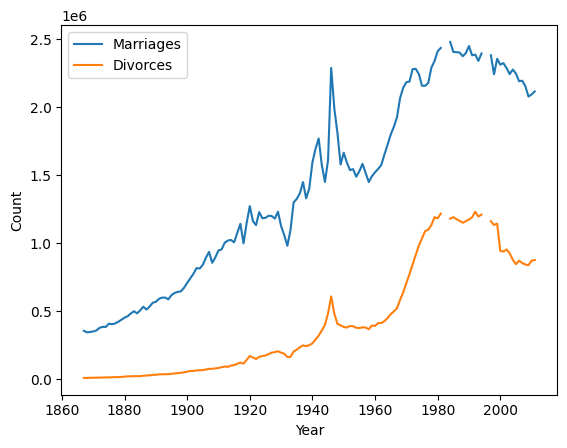

In [90]:
plt.plot(mar_div_df['Year'].values, mar_div_df['Marriages'].values, label='Marriages')
plt.plot(mar_div_df['Year'].values, mar_div_df['Divorces'].values, label='Divorces')
plt.legend()
plt.ylabel('Count')
plt.xlabel('Year')
plt.show()

## Question 7
Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

In [92]:
mar_div_df_fil = mar_div_df[mar_div_df['Year'].isin([1900, 1950, 2000])]
mar_div_df_fil

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
33,1900,709000.0,56000.0,76094000,9.3,0.7
83,1950,1667000.0,385000.0,151684000,11.0,2.5
133,2000,2315000.0,944000.0,282398000,8.2,3.3


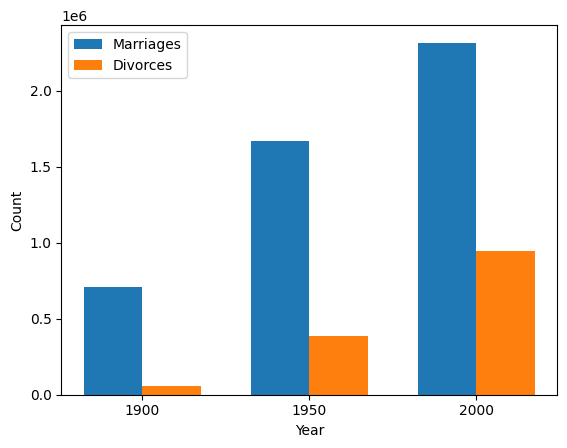

In [99]:
x_labels = mar_div_df_fil['Year'].values
y_marriage = mar_div_df_fil['Marriages'].values
y_divorce = mar_div_df_fil['Divorces'].values

x = np.arange(len(x_labels))  
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, y_marriage, width, label='Marriages')
rects2 = ax.bar(x + width/2, y_divorce, width, label='Divorces')

# Labeling the graph
ax.set_ylabel('Count')
ax.set_xlabel('Year')
ax.set_xticks(x, x_labels)
ax.legend()
plt.show()

## Question 8
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name. Don't forget to label your axes!

In [ ]:
import pandas as pd

In [104]:
actors_kill_df = pd.read_csv('actors_kill_count.csv')
actors_kill_df.head()

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239


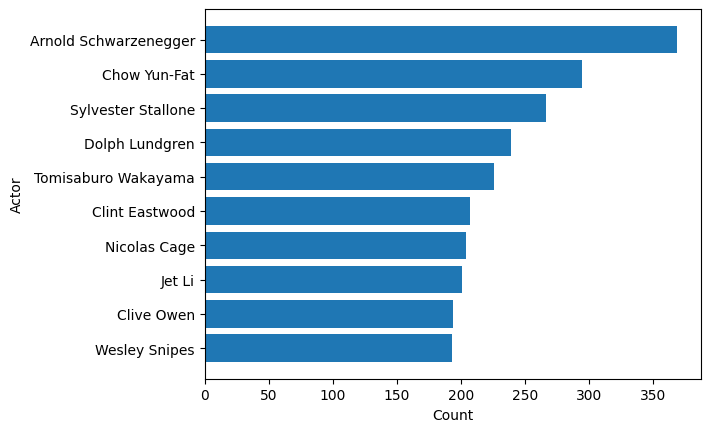

In [106]:
actors_kill_df = actors_kill_df.sort_values('Count')
plt.barh(actors_kill_df['Actor'].values, actors_kill_df['Count'].values)
plt.ylabel('Actor')
plt.xlabel('Count')
plt.show()

## Question 9
Create a pie chart showing the fraction of all Roman Emperors that were assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.


In [100]:
import pandas as pd

In [107]:
roman_emp_df = pd.read_csv('roman-emperor-reigns.xls')
roman_emp_df.head()

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide


In [108]:
roman_emp_df['Cause_of_Death'].value_counts()

Assassinated             22
Natural causes           16
Killed in battle          8
Possibly assassinated     8
Suicide                   5
Illness                   5
Executed                  3
Died in captivity         1
Name: Cause_of_Death, dtype: int64

In [110]:
roman_emp_df_ass = roman_emp_df[roman_emp_df['Cause_of_Death'].str.lower().str.contains('assassinated')]
roman_emp_df_ass

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
5,Galba,0.58,Assassinated
7,Vitellius,0.67,Assassinated
10,Domitian,15.00,Assassinated
17,Commodus,15.00,Assassinated
18,Pertinax,0.25,Assassinated
21,Caracalla,19.00,Assassinated


In [111]:
num_assassinated = len(roman_emp_df_ass)
num_not_ass = len(roman_emp_df) - num_assassinated

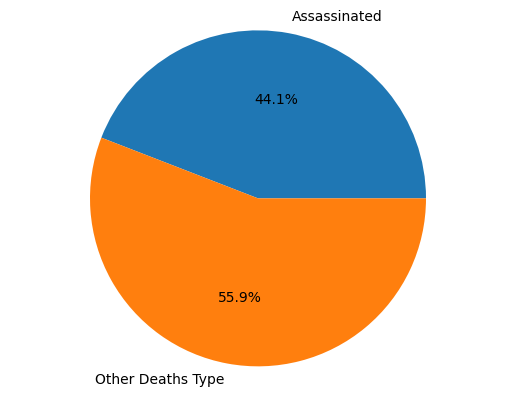

In [112]:
pie_data = [num_assassinated, num_not_ass]
pie_label = ['Assassinated', 'Other Deaths Type']
plt.pie(pie_data, labels=pie_label, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

## Question 10
Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.
Don't forget to label your axes! Color each dot according to its year.

In [113]:
import pandas as pd

In [115]:
arc_rev_cs_doct_df = pd.read_csv('arcade-revenue-vs-cs-doctorates.xls')
arc_rev_cs_doct_df.head()

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948


In [116]:
print(arc_rev_cs_doct_df['Year'].min())
print(arc_rev_cs_doct_df['Year'].max())

2000
2009


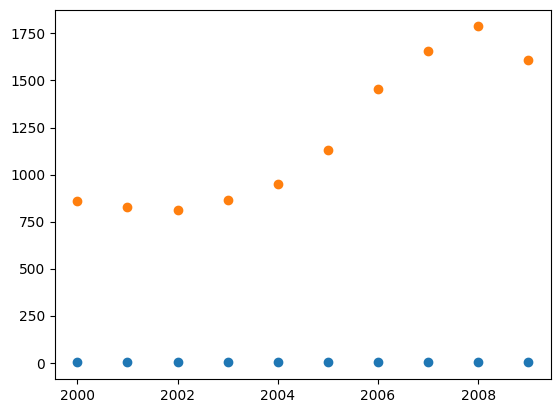

In [118]:
plt.scatter(arc_rev_cs_doct_df['Year'].values, arc_rev_cs_doct_df['Total Arcade Revenue (billions)'].values)
plt.scatter(arc_rev_cs_doct_df['Year'].values, arc_rev_cs_doct_df['Computer Science Doctorates Awarded (US)'].values)

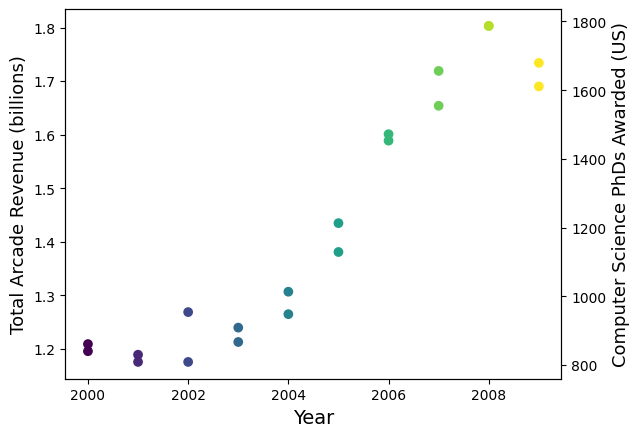

In [126]:
colors = [i*10 for i in range(len(arc_rev_cs_doct_df['Year'].unique()))]
fig,ax = plt.subplots()

ax.scatter(arc_rev_cs_doct_df['Year'].values,
        arc_rev_cs_doct_df['Total Arcade Revenue (billions)'].values,
        c=colors)
# set x label
ax.set_xlabel("Year", fontsize = 14)
# set y label
ax.set_ylabel("Total Arcade Revenue (billions)", fontsize=13)

ax2=ax.twinx()
# make a plot with different y-axis 
ax2.scatter(arc_rev_cs_doct_df['Year'].values,
         arc_rev_cs_doct_df['Computer Science Doctorates Awarded (US)'].values,
         c=colors)
ax2.set_ylabel("Computer Science PhDs Awarded (US)",fontsize=13)
plt.show()